<a href="https://colab.research.google.com/github/JustasBan/kursinio-modeliai/blob/main/kursinio_modeliai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset initialize

In [ ]:
# external services & data
from google.colab import drive
drive.mount('/content/drive')

#!git clone https://github.com/jannisborn/covid19_ultrasound.git

Mounted at /content/drive


In [ ]:
import os
import glob

# Define the base directory where the class folders are located
base_dir = '/content/drive/MyDrive/kursinis/data'

# Initialize a dictionary to hold the count of images in each class
class_counts = {}

# Iterate through each class directory and count the images
for class_dir in ['covid', 'pneumonia', 'regular', 'viral']:
    # Create the full path to the class directory
    full_dir_path = os.path.join(base_dir, class_dir)

    # Use glob to get all the image file paths
    image_paths = glob.glob(os.path.join(full_dir_path, '*'))

    # Update the dictionary with the count of images for this class
    class_counts[class_dir] = len(image_paths)

# Print out the counts
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")

# Calculate and print additional statistics if needed
total_images = sum(class_counts.values())
print(f"Total number of images: {total_images}")

for class_name, count in class_counts.items():
    proportion = (count / total_images) * 100
    print(f"Class '{class_name}' makes up {proportion:.2f}% of the dataset")

Class 'covid': 560 images
Class 'pneumonia': 482 images
Class 'regular': 1245 images
Class 'viral': 72 images
Total number of images: 2359
Class 'covid' makes up 23.74% of the dataset
Class 'pneumonia' makes up 20.43% of the dataset
Class 'regular' makes up 52.78% of the dataset
Class 'viral' makes up 3.05% of the dataset


In [ ]:
import os
import shutil
import numpy as np

# Define the directory where your dataset is located
base_dir = '/content/drive/MyDrive/kursinis/data'  # Change to your dataset directory

# Define the split sizes
train_split = 0.70
val_split = 0.15
test_split = 0.15  # Ensure that train_split + val_split + test_split equals 1.0

# Create directories for the train/val/test splits if they don't exist
split_dirs = ['train', 'val', 'test']
classes = ['covid', 'pneumonia', 'regular', 'viral']

for d in split_dirs:
    for class_name in classes:
        os.makedirs(os.path.join(base_dir, d, class_name), exist_ok=True)

# Function to split the data
def split_data(class_name):
    class_dir = os.path.join(base_dir, class_name)
    images = os.listdir(class_dir)

    # Shuffle the image list
    np.random.shuffle(images)

    # Calculate the split indices
    train_end = int(len(images) * train_split)
    val_end = train_end + int(len(images) * val_split)

    # Split the images into train/val/test
    train_images = images[:train_end]
    val_images = images[train_end:val_end]
    test_images = images[val_end:]

    # Function to copy images to the respective directory
    def copy_images(images, dest):
        for image in images:
            shutil.copy(os.path.join(class_dir, image), os.path.join(base_dir, dest, class_name, image))

    # Copy the images
    copy_images(train_images, 'train')
    copy_images(val_images, 'val')
    copy_images(test_images, 'test')

# Split the data for each class
for class_name in classes:
    split_data(class_name)

print("Data has been split into train, val, and test directories.")


Data has been split into train, val, and test directories.


In [ ]:
import os

# Define the base directory where the split folders are located
base_dir = '/content/drive/MyDrive/kursinis/data/splits'  # Change to your dataset directory

# Define the split directories and the classes
splits = ['train', 'val', 'test']
classes = ['covid', 'pneumonia', 'regular', 'viral']

# Function to print the statistics of the dataset
def print_split_statistics():
    for split in splits:
        print(f"Statistics for {split} set:")
        split_dir = os.path.join(base_dir, split)
        total_images = 0
        class_counts = {}

        for class_name in classes:
            class_path = os.path.join(split_dir, class_name)
            count = len(os.listdir(class_path))
            class_counts[class_name] = count
            total_images += count

        # Print the counts and proportions
        for class_name, count in class_counts.items():
            proportion = (count / total_images) * 100 if total_images > 0 else 0
            print(f" - Class '{class_name}': {count} images, {proportion:.2f}% of the {split} set")

        print(f"Total number of images in {split} set: {total_images}\n")

# Print the statistics
print_split_statistics()


Statistics for train set:
 - Class 'covid': 392 images, 23.76% of the train set
 - Class 'pneumonia': 337 images, 20.42% of the train set
 - Class 'regular': 871 images, 52.79% of the train set
 - Class 'viral': 50 images, 3.03% of the train set
Total number of images in train set: 1650

Statistics for val set:
 - Class 'covid': 84 images, 23.86% of the val set
 - Class 'pneumonia': 72 images, 20.45% of the val set
 - Class 'regular': 186 images, 52.84% of the val set
 - Class 'viral': 10 images, 2.84% of the val set
Total number of images in val set: 352

Statistics for test set:
 - Class 'covid': 84 images, 23.53% of the test set
 - Class 'pneumonia': 73 images, 20.45% of the test set
 - Class 'regular': 188 images, 52.66% of the test set
 - Class 'viral': 12 images, 3.36% of the test set
Total number of images in test set: 357



## MobileNetV3Small

Found 1650 images belonging to 4 classes.
Found 352 images belonging to 4 classes.
Class index 0: Weight 1.05
Class index 1: Weight 1.22
Class index 2: Weight 0.47
Class index 3: Weight 8.25
Epoch 1/100
52/52 [==============================] - 45s 781ms/step - loss: 1.8681 - accuracy: 0.7067 - val_loss: 0.9534 - val_accuracy: 0.8438
Epoch 2/100
52/52 [==============================] - 37s 715ms/step - loss: 0.6466 - accuracy: 0.8697 - val_loss: 1.3037 - val_accuracy: 0.7415
Epoch 3/100
52/52 [==============================] - 31s 600ms/step - loss: 0.4520 - accuracy: 0.8921 - val_loss: 0.4744 - val_accuracy: 0.9119
Epoch 4/100
52/52 [==============================] - 35s 668ms/step - loss: 0.3180 - accuracy: 0.9152 - val_loss: 0.4397 - val_accuracy: 0.8977
Epoch 5/100
52/52 [==============================] - 34s 660ms/step - loss: 0.2759 - accuracy: 0.9152 - val_loss: 0.3713 - val_accuracy: 0.9119
Epoch 6/100
52/52 [==============================] - 48s 918ms/step - loss: 0.1999 - accu

<ipython-input-23-25215b61c95e>:114: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-23-25215b61c95e>:116: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-23-25215b61c95e>:123: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-23-25215b61c95e>:125: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precede

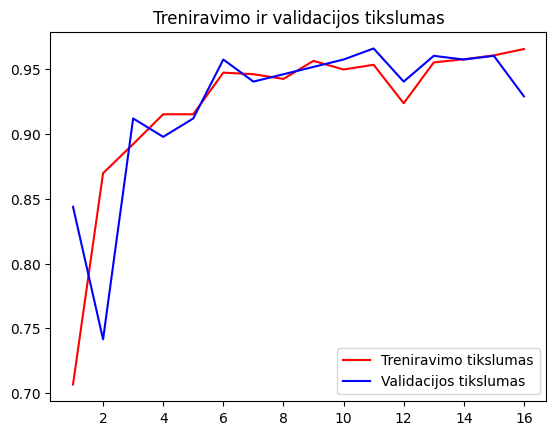

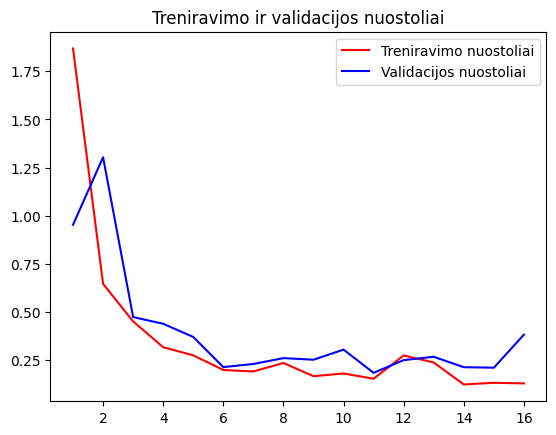

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

# Directory setup
base_dir = '/content/drive/MyDrive/kursinis/data/splits'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Image parameters
img_height, img_width = 224, 224
batch_size = 32

# Data generators with augmentation for the training set
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input
)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Compute class weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

# Print the computed class weights
for class_index, weight in class_weights.items():
    print(f"Class index {class_index}: Weight {weight:.2f}")

# Load MobileNetV3Small
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Focal Loss
def focal_loss(gamma=2., alpha=4.):
    gamma = float(gamma)
    alpha = float(alpha)
    def focal_loss_fixed(y_true, y_pred):
        epsilon = 1.e-9
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_true = tf.cast(y_true, tf.float32)
        loss = -y_true * alpha * tf.pow((1 - y_pred), gamma) * tf.math.log(y_pred)
        loss = tf.reduce_sum(loss, axis=1)
        return loss
    return focal_loss_fixed

# Compile the model
model.compile(optimizer='adam', loss=focal_loss(), metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Plot the training graph
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Training accuracy in red
    plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
    # Validation accuracy in blue
    plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
    plt.title('Treniravimo ir validacijos tikslumas')
    plt.legend()

    plt.figure()

    # Training loss in red
    plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
    # Validation loss in blue
    plt.plot(epochs, val_loss, 'b-', label='Validacijos nuostoliai', color='blue')
    plt.title('Treniravimo ir validacijos nuostoliai')
    plt.legend()

    plt.show()

plot_training(history)


Found 357 images belonging to 4 classes.
12/12 [==============================] - 3s 202ms/step
              precision    recall  f1-score   support

       covid       1.00      0.98      0.99        84
   pneumonia       0.98      0.88      0.93        73
     regular       0.97      1.00      0.99       188
       viral       0.71      1.00      0.83        12

    accuracy                           0.97       357
   macro avg       0.92      0.96      0.93       357
weighted avg       0.97      0.97      0.97       357

Accuracy: 0.969187675070028
Specificity for covid: 1.00
Specificity for pneumonia: 1.00
Specificity for regular: 0.97
Specificity for viral: 0.99
Macro-average Specificity: 0.99


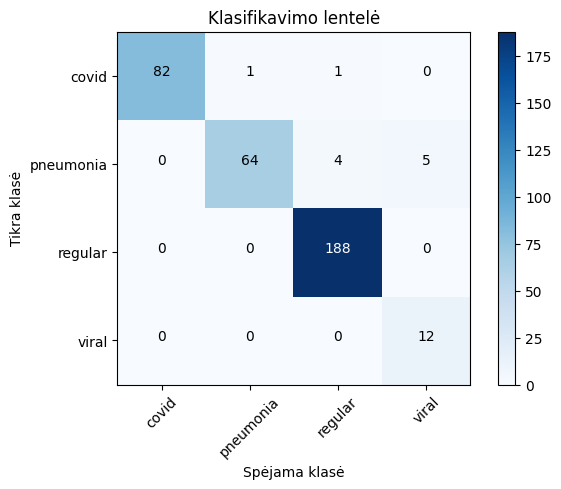

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import itertools
import matplotlib.pyplot as plt

test_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/kursinis/data/splits/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict the label of the test data
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict(test_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calculate the metrics
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
accuracy = accuracy_score(true_classes, predicted_classes)

# Print the metrics
print(report)
print('Accuracy:', accuracy)

# Function to calculate specificity for each class
def calculate_specificity(conf_matrix, class_index):
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[class_index, :]) - np.sum(conf_matrix[:, class_index]) + conf_matrix[class_index, class_index]
    fp = np.sum(conf_matrix[:, class_index]) - conf_matrix[class_index, class_index]
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    return specificity

# Calculate and print specificity for each class
for i in range(len(test_generator.class_indices)):
    spec = calculate_specificity(conf_matrix, i)
    class_name = list(test_generator.class_indices.keys())[i]
    print(f'Specificity for {class_name}: {spec:.2f}')

# Calculate specificity for each class and compute macro-average
specificities = []
for i in range(len(test_generator.class_indices)):
    spec = calculate_specificity(conf_matrix, i)
    specificities.append(spec)

# Calculate and print macro-average specificity
macro_avg_specificity = np.mean(specificities)
print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Klasifikavimo lentelė',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Tikra klasė')
    plt.xlabel('Spėjama klasė')

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, classes=class_labels)
plt.show()


In [ ]:
# Counting the parameters in the model
total_params = model.count_params()
print(f'Total number of parameters in the model: {total_params}')

# Save the model
model.save('/content/drive/MyDrive/kursinis/MobileNetV3Small.h5')


Total number of parameters in the model: 1534068


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## NASNetMobile

Found 1650 images belonging to 4 classes.
Found 352 images belonging to 4 classes.
Class index 0: Weight 1.05
Class index 1: Weight 1.22
Class index 2: Weight 0.47
Class index 3: Weight 8.25
Epoch 1/100
52/52 [==============================] - 53s 676ms/step - loss: 5.0713 - accuracy: 0.5242 - val_loss: 3.4157 - val_accuracy: 0.4517
Epoch 2/100
52/52 [==============================] - 32s 612ms/step - loss: 3.0512 - accuracy: 0.5552 - val_loss: 1.4958 - val_accuracy: 0.7244
Epoch 3/100
52/52 [==============================] - 31s 590ms/step - loss: 2.0817 - accuracy: 0.6212 - val_loss: 1.7046 - val_accuracy: 0.6989
Epoch 4/100
52/52 [==============================] - 31s 599ms/step - loss: 1.9943 - accuracy: 0.6703 - val_loss: 1.2392 - val_accuracy: 0.7330
Epoch 5/100
52/52 [==============================] - 30s 585ms/step - loss: 2.2516 - accuracy: 0.6624 - val_loss: 1.6792 - val_accuracy: 0.6534
Epoch 6/100
52/52 [==============================] - 30s 584ms/step - loss: 1.8330 - accu

<ipython-input-32-e9766bf4af9a>:110: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-32-e9766bf4af9a>:112: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-32-e9766bf4af9a>:119: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-32-e9766bf4af9a>:121: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precede

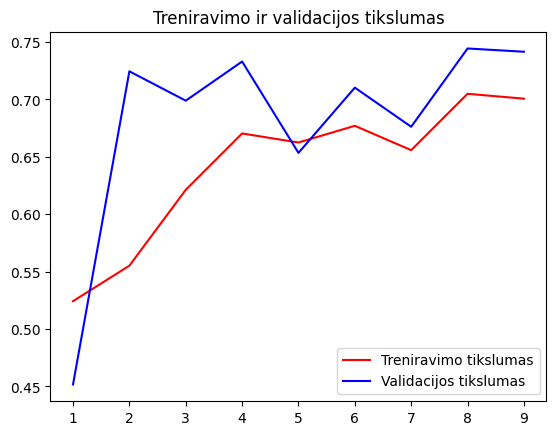

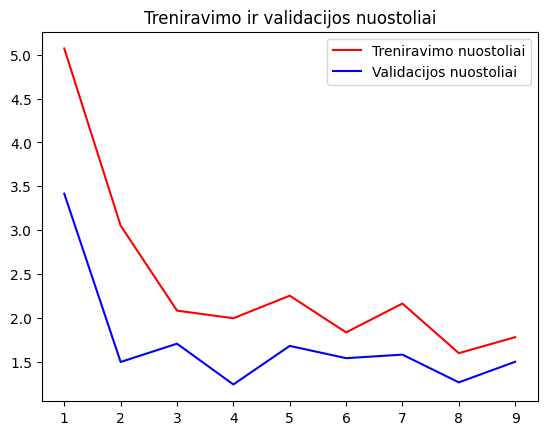

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

# Directory setup
base_dir = '/content/drive/MyDrive/kursinis/data/splits'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Image parameters
img_height, img_width = 224, 224
batch_size = 32

# Data generators with augmentation for the training set
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Compute class weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

# Print the computed class weights
for class_index, weight in class_weights.items():
    print(f"Class index {class_index}: Weight {weight:.2f}")

base_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Focal Loss
def focal_loss(gamma=2., alpha=4.):
    gamma = float(gamma)
    alpha = float(alpha)
    def focal_loss_fixed(y_true, y_pred):
        epsilon = 1.e-9
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_true = tf.cast(y_true, tf.float32)
        loss = -y_true * alpha * tf.pow((1 - y_pred), gamma) * tf.math.log(y_pred)
        loss = tf.reduce_sum(loss, axis=1)
        return loss
    return focal_loss_fixed

# Compile the model
model.compile(optimizer='adam', loss=focal_loss(), metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Plot the training graph
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Training accuracy in red
    plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
    # Validation accuracy in blue
    plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
    plt.title('Treniravimo ir validacijos tikslumas')
    plt.legend()

    plt.figure()

    # Training loss in red
    plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
    # Validation loss in blue
    plt.plot(epochs, val_loss, 'b-', label='Validacijos nuostoliai', color='blue')
    plt.title('Treniravimo ir validacijos nuostoliai')
    plt.legend()

    plt.show()

plot_training(history)


Found 357 images belonging to 4 classes.
12/12 [==============================] - 6s 171ms/step
              precision    recall  f1-score   support

       covid       0.55      0.82      0.66        84
   pneumonia       0.83      0.55      0.66        73
     regular       0.84      0.79      0.81       188
       viral       0.67      0.33      0.44        12

    accuracy                           0.73       357
   macro avg       0.72      0.62      0.64       357
weighted avg       0.76      0.73      0.73       357

Accuracy: 0.7310924369747899
Specificity for covid: 0.79
Specificity for pneumonia: 0.97
Specificity for regular: 0.83
Specificity for viral: 0.99
Macro-average Specificity: 0.90


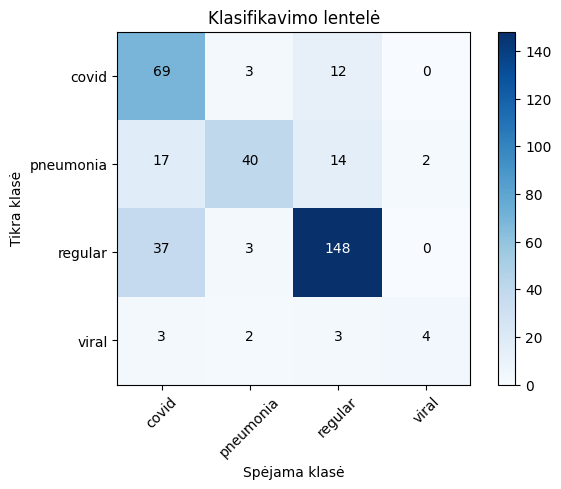

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import itertools
import matplotlib.pyplot as plt

test_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/kursinis/data/splits/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict the label of the test data
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict(test_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calculate the metrics
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
accuracy = accuracy_score(true_classes, predicted_classes)

# Print the metrics
print(report)
print('Accuracy:', accuracy)

# Function to calculate specificity for each class
def calculate_specificity(conf_matrix, class_index):
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[class_index, :]) - np.sum(conf_matrix[:, class_index]) + conf_matrix[class_index, class_index]
    fp = np.sum(conf_matrix[:, class_index]) - conf_matrix[class_index, class_index]
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    return specificity

# Calculate and print specificity for each class
for i in range(len(test_generator.class_indices)):
    spec = calculate_specificity(conf_matrix, i)
    class_name = list(test_generator.class_indices.keys())[i]
    print(f'Specificity for {class_name}: {spec:.2f}')

# Calculate specificity for each class and compute macro-average
specificities = []
for i in range(len(test_generator.class_indices)):
    spec = calculate_specificity(conf_matrix, i)
    specificities.append(spec)

# Calculate and print macro-average specificity
macro_avg_specificity = np.mean(specificities)
print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Klasifikavimo lentelė',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Tikra klasė')
    plt.xlabel('Spėjama klasė')

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, classes=class_labels)
plt.show()


In [ ]:
# Counting the parameters in the model
total_params = model.count_params()
print(f'Total number of parameters in the model: {total_params}')

# Save the model
model.save('/content/drive/MyDrive/kursinis/NASNetMobile.h5')


Total number of parameters in the model: 5356184


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## ConvNeXtTiny

Found 1650 images belonging to 4 classes.
Found 352 images belonging to 4 classes.
Class index 0: Weight 1.05
Class index 1: Weight 1.22
Class index 2: Weight 0.47
Class index 3: Weight 8.25
Epoch 1/100
52/52 [==============================] - 48s 704ms/step - loss: 1.2682 - accuracy: 0.7752 - val_loss: 0.7661 - val_accuracy: 0.8125
Epoch 2/100
52/52 [==============================] - 34s 656ms/step - loss: 0.3669 - accuracy: 0.9000 - val_loss: 0.7304 - val_accuracy: 0.8523
Epoch 3/100
52/52 [==============================] - 34s 646ms/step - loss: 0.2961 - accuracy: 0.9176 - val_loss: 0.5384 - val_accuracy: 0.8892
Epoch 4/100
52/52 [==============================] - 34s 647ms/step - loss: 0.2329 - accuracy: 0.9412 - val_loss: 0.8371 - val_accuracy: 0.8438
Epoch 5/100
52/52 [==============================] - 36s 692ms/step - loss: 0.2113 - accuracy: 0.9430 - val_loss: 0.7538 - val_accuracy: 0.8807
Epoch 6/100
52/52 [==============================] - 34s 649ms/step - loss: 0.1337 - accu

<ipython-input-29-eea1d32b8ab8>:110: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-29-eea1d32b8ab8>:112: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-29-eea1d32b8ab8>:119: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-29-eea1d32b8ab8>:121: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precede

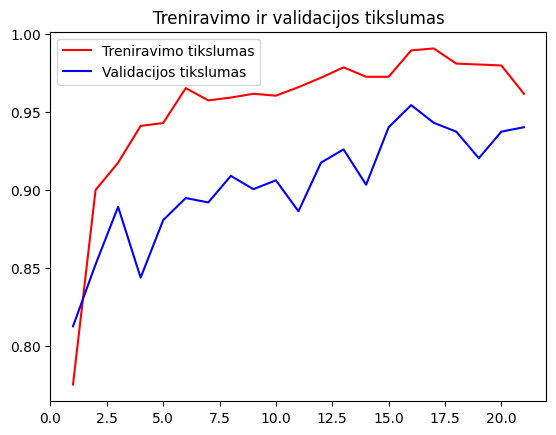

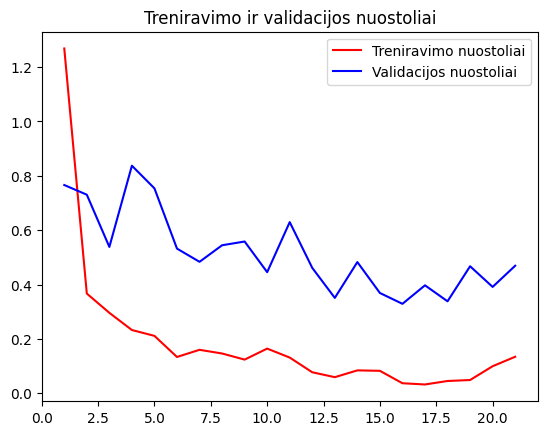

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ConvNeXtTiny
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

# Directory setup
base_dir = '/content/drive/MyDrive/kursinis/data/splits'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Image parameters
img_height, img_width = 224, 224
batch_size = 32

# Data generators with augmentation for the training set
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Compute class weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

# Print the computed class weights
for class_index, weight in class_weights.items():
    print(f"Class index {class_index}: Weight {weight:.2f}")

base_model = ConvNeXtTiny(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Focal Loss
def focal_loss(gamma=2., alpha=4.):
    gamma = float(gamma)
    alpha = float(alpha)
    def focal_loss_fixed(y_true, y_pred):
        epsilon = 1.e-9
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_true = tf.cast(y_true, tf.float32)
        loss = -y_true * alpha * tf.pow((1 - y_pred), gamma) * tf.math.log(y_pred)
        loss = tf.reduce_sum(loss, axis=1)
        return loss
    return focal_loss_fixed

# Compile the model
model.compile(optimizer='adam', loss=focal_loss(), metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Plot the training graph
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Training accuracy in red
    plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
    # Validation accuracy in blue
    plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
    plt.title('Treniravimo ir validacijos tikslumas')
    plt.legend()

    plt.figure()

    # Training loss in red
    plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
    # Validation loss in blue
    plt.plot(epochs, val_loss, 'b-', label='Validacijos nuostoliai', color='blue')
    plt.title('Treniravimo ir validacijos nuostoliai')
    plt.legend()

    plt.show()

plot_training(history)


Found 357 images belonging to 4 classes.
12/12 [==============================] - 6s 387ms/step
              precision    recall  f1-score   support

       covid       0.99      0.89      0.94        84
   pneumonia       0.90      0.90      0.90        73
     regular       0.94      0.97      0.96       188
       viral       0.92      1.00      0.96        12

    accuracy                           0.94       357
   macro avg       0.94      0.94      0.94       357
weighted avg       0.94      0.94      0.94       357

Accuracy: 0.9411764705882353
Specificity for covid: 1.00
Specificity for pneumonia: 0.98
Specificity for regular: 0.93
Specificity for viral: 1.00
Macro-average Specificity: 0.97


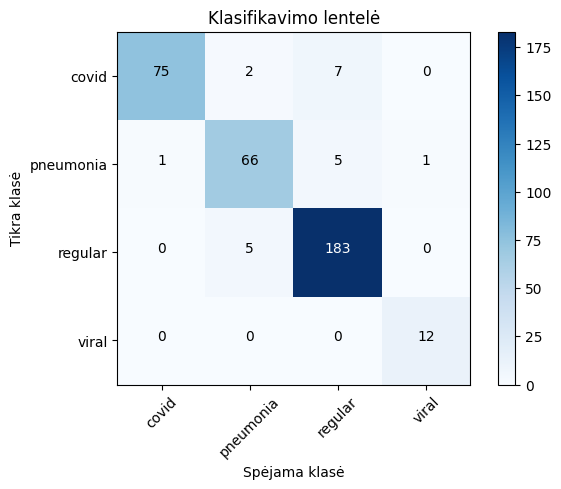

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import itertools
import matplotlib.pyplot as plt

test_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/kursinis/data/splits/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict the label of the test data
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict(test_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calculate the metrics
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
accuracy = accuracy_score(true_classes, predicted_classes)

# Print the metrics
print(report)
print('Accuracy:', accuracy)

# Function to calculate specificity for each class
def calculate_specificity(conf_matrix, class_index):
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[class_index, :]) - np.sum(conf_matrix[:, class_index]) + conf_matrix[class_index, class_index]
    fp = np.sum(conf_matrix[:, class_index]) - conf_matrix[class_index, class_index]
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    return specificity

# Calculate and print specificity for each class
for i in range(len(test_generator.class_indices)):
    spec = calculate_specificity(conf_matrix, i)
    class_name = list(test_generator.class_indices.keys())[i]
    print(f'Specificity for {class_name}: {spec:.2f}')

# Calculate specificity for each class and compute macro-average
specificities = []
for i in range(len(test_generator.class_indices)):
    spec = calculate_specificity(conf_matrix, i)
    specificities.append(spec)

# Calculate and print macro-average specificity
macro_avg_specificity = np.mean(specificities)
print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Klasifikavimo lentelė',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Tikra klasė')
    plt.xlabel('Spėjama klasė')

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, classes=class_labels)
plt.show()


In [ ]:
# Counting the parameters in the model
total_params = model.count_params()
print(f'Total number of parameters in the model: {total_params}')

# Save the model
model.save('/content/drive/MyDrive/kursinis/ConvNeXtTiny.h5')


Total number of parameters in the model: 28611684


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
